On vas s'interesser à décrire le Bat Algorithm 


Définitions : 
Fréquence : le nombre de fois qu'un phénomène périodique se reproduit par unité de temps.

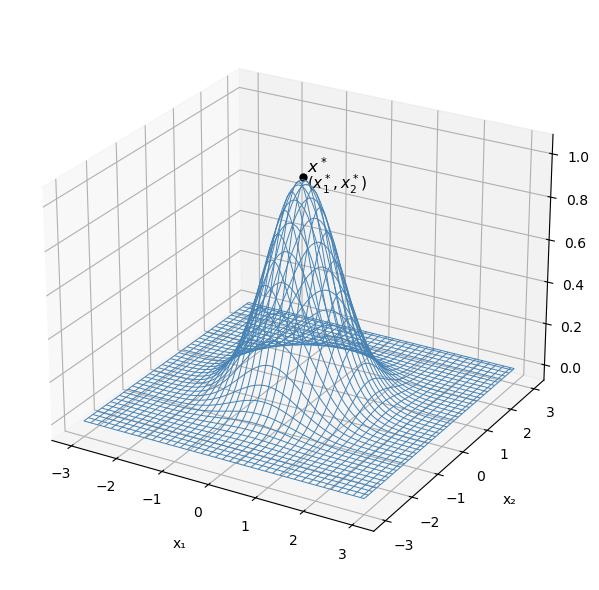

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fonction volcan
def f(x, y):
    return np.exp(-(x**2 + y**2))

# Grille
x = np.linspace(-3, 3, 80)
y = np.linspace(-3, 3, 80)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Maximum global
x_star, y_star = 0.0, 0.0
z_star = f(x_star, y_star)

# Plot avec axes
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

# Grillage
ax.plot_wireframe(X, Y, Z, color='steelblue', linewidth=0.7)

# Point pour le maximum
ax.scatter(
    x_star, y_star, z_star + 0.015,
    color="black", s=25, marker="o", depthshade=False
)

# Labels du point
ax.text(
    x_star + 0.1, y_star, z_star + 0.04,
    r"$x^*$", color="black", fontsize=12, weight="bold"
)

ax.text(
    x_star + 0.1, y_star, z_star - 0.04,
    r"$(x_1^*, x_2^*)$", color="black", fontsize=11
)

# Axes
ax.set_xlabel("x₁", labelpad=10)
ax.set_ylabel("x₂", labelpad=10)
ax.set_zlabel("f(x₁, x₂)", labelpad=10)

ax.view_init(elev=25, azim=-60)

plt.tight_layout()
plt.show()
